#  Relative-entropy

Given $(0 < \lambda < 1)$, and $r > 0$ define:

$$
V_{\lambda,r} = \begin{bmatrix} (1-\lambda) + \lambda e^{-2r} & 0 \\ 0 & (1-\lambda) + \lambda e^{2r} \end{bmatrix}
$$

Now for $\alpha = \begin{bmatrix} x \\ y \end{bmatrix} \in \mathbb{R}^2 $, define:

$$
\delta(\lambda_1,\lambda_2, \alpha) = (\sqrt{\lambda_1} - \sqrt{\lambda_2}) \alpha
$$

Define:

$$
G_{\lambda} = 2iJ \coth^{-1}(2V_{\lambda}iJ),
$$

where:

$$
J = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}.
$$

Then define:

$$
\Sigma\left(V_{\lambda_1,r}, V_{\lambda_2,r}, \delta\right) = \frac{\ln \operatorname{det}\left(V_{\lambda_2,r}+\frac{i}{2}J\right) + \operatorname{Tr}\left(V_{\lambda_1,r} G_{\lambda_2}\right) + \delta(\lambda_1,\lambda_2, \alpha)^T G_{\lambda_2} \delta(\lambda_1,\lambda_2, \alpha)}{2 \ln 2}.
$$

We can then define:

$$
S(\lambda_1,\lambda_2, r) = -\Sigma(V_{\lambda_1,r}, V_{\lambda_1,r},0) + \Sigma(V_{\lambda_1,r}, V_{\lambda_2,r},\delta(\lambda_1,\lambda_2, \alpha))
$$

We need to evaluate this expression and plot the graph when $\lambda_1$ and $\lambda_2$ vary in $(0,1)$.


## Define the matrices $(V_{\lambda_1,r}) and (V_{\lambda_2,r})$:

In [ ]:
def V(lambda_val, r):
    matrix = np.array([[1 - lambda_val + lambda_val * np.exp(-2 * r), 0],
                       [0, 1 - lambda_val + lambda_val * np.exp(2 * r)]])
    return matrix


## Define the function $\delta(\lambda_1,\lambda_2, \alpha)$:

In [ ]:
def delta(lambda_1, lambda_2, alpha):
    return (np.sqrt(lambda_1) - np.sqrt(lambda_2)) * alpha

## Define the function $G_\lambda$

In [ ]:
# Define the function G_lambda
def G(lambda_val):
    J = np.array([[0, 1], [-1, 0]])
    V_lambda = V(lambda_val, 1)  # Assuming r = 1
    G_val = 2j * J * np.arctanh(2 * V_lambda * 1j * J)
    return G_val

## Define the function $\Sigma(V1, V2, \delta)$

In [ ]:

def Sigma(V1, V2, delta):
    term1 = np.log2(np.linalg.det(V2 + 1j * G(1) / 2))
    term2 = np.trace(V1 @ G(2))
    term3 = delta.T @ G(2) @ delta
    result = (term1 + term2 + term3) / (2 * np.log2(2))
    return result.real

## Define the function $S(\lambda_1, \lambda_2, r)$

In [ ]:
def S(lambda_1, lambda_2, r):
    V1 = V(lambda_1, r)
    V2 = V(lambda_2, r)
    alpha = np.array([0, 0])  # Assuming alpha as [0, 0]
    delta_val = delta(lambda_1, lambda_2, alpha)
    result = -Sigma(V1, V1, np.array([0, 0])) + Sigma(V1, V2, delta_val)
    return result


### Plotting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Generate values for lambda_1 and lambda_2
lambda_vals = np.linspace(0.01, 0.99, 100)
r_val = 0.5  # Choose an appropriate value for r

# Calculate S(lambda_1, lambda_2, r) for each pair
S_vals = np.zeros((len(lambda_vals), len(lambda_vals)))
for i, lambda_1 in enumerate(lambda_vals):
    for j, lambda_2 in enumerate(lambda_vals):
        S_vals[i, j] = S(lambda_1, lambda_2, r_val)

# Plotting
X, Y = np.meshgrid(lambda_vals, lambda_vals)
plt.contourf(X, Y, S_vals, cmap='viridis')
plt.colorbar(label='S')
plt.xlabel('Lambda 1')
plt.ylabel('Lambda 2')
plt.title('S as a Function of Lambda 1 and Lambda 2')
plt.show()


## 3D Surface Plot for $S(\lambda_1, \lambda_2, r)$:

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up the figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(lambda_vals, lambda_vals)
# Flatten X and Y into 1D arrays
X_flat = X.flatten()
Y_flat = Y.flatten()

# Plot the 3D surface using Sigma_vals
surf = ax.plot_trisurf(X_flat, Y_flat, S_vals.flatten(), cmap='viridis')

# Set labels and title
ax.set_xlabel(r'$\lambda_1$')
ax.set_ylabel(r'$\lambda_2$')
ax.set_zlabel(r'$S(\lambda_1, \lambda_2, r)$')
ax.set_title(r'$S(\lambda_1, \lambda_2, r)$ as a 3D Surface')

# Add color bar
fig.colorbar(surf, ax=ax, label=r'$S(\lambda_1, \lambda_2, r)$')
# Save the plot as a PDF file
plt.savefig('3D_surface_plot_S_vals.pdf')
# Show the plot
plt.show()

#### Single code for plotting

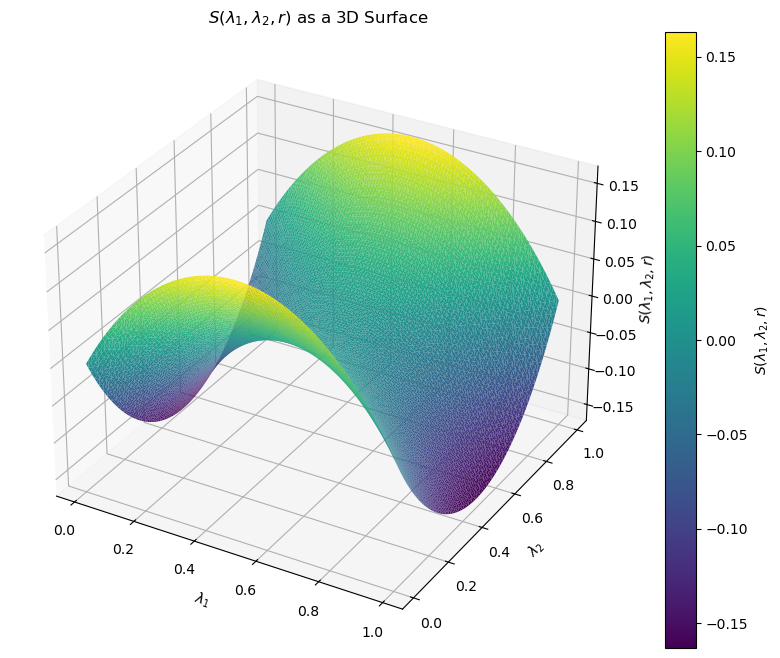

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the matrices V_lambda,r
def V(lambda_val, r):
    matrix = np.array([[1 - lambda_val + lambda_val * np.exp(-2 * r), 0],
                       [0, 1 - lambda_val + lambda_val * np.exp(2 * r)]])
    return matrix

# Define the function delta(lambda_1, lambda_2, alpha)
def delta(lambda_1, lambda_2, alpha):
    return (np.sqrt(lambda_1) - np.sqrt(lambda_2)) * alpha

# Define the function G_lambda
def G(lambda_val):
    J = np.array([[0, 1], [-1, 0]])
    V_lambda = V(lambda_val, 1)  # Assuming r = 1
    G_val = 2j * J * np.arctanh(2 * V_lambda * 1j * J)
    return G_val

# Define the function Sigma(V1, V2, delta)
def Sigma(V1, V2, delta):
    term1 = np.log(np.linalg.det(V2 + 1j * G(1) / 2))
    term2 = np.trace(V1 @ G(2))
    term3 = delta.T @ G(2) @ delta
    result = (term1 + term2 + term3) / (2 * np.log(2))
    return result.real  # Taking the real part 

## Define the function $S(\lambda_1, \lambda_2, r)$
def S(lambda_1, lambda_2, r):
    V1 = V(lambda_1, r)
    V2 = V(lambda_2, r)
    alpha = np.array([0, 0])  # Assuming alpha as [0, 0]
    delta_val = delta(lambda_1, lambda_2, alpha)
    result = -Sigma(V1, V1, np.array([0, 0])) + Sigma(V1, V2, delta_val)
    return result

# Generate values for lambda_1 and lambda_2
lambda_vals = np.linspace(0.01, 0.99, 100)
r_val = 0.5  # Choose an appropriate value for r

# Calculate Sigma(lambda_1, lambda_2, r) for each pair
Sigma_vals = np.zeros((len(lambda_vals), len(lambda_vals)))
for i, lambda_1 in enumerate(lambda_vals):
    for j, lambda_2 in enumerate(lambda_vals):
        V1 = V(lambda_1, r_val)
        V2 = V(lambda_2, r_val)
        alpha = np.array([0, 0])  # Assuming alpha as [0, 0]
        delta_val = delta(lambda_1, lambda_2, alpha)
        Sigma_vals[i, j] = Sigma(V1, V2, delta_val)

# Calculate S(lambda_1, lambda_2, r) for each pair
S_vals = np.zeros((len(lambda_vals), len(lambda_vals)))
for i, lambda_1 in enumerate(lambda_vals):
    for j, lambda_2 in enumerate(lambda_vals):
        S_vals[i, j] = S(lambda_1, lambda_2, r_val)

# Set up the figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(lambda_vals, lambda_vals)
# Flatten X and Y into 1D arrays
X_flat = X.flatten()
Y_flat = Y.flatten()

# Plot the 3D surface using Sigma_vals
surf = ax.plot_trisurf(X_flat, Y_flat, S_vals.flatten(), cmap='viridis')

# Set labels and title
ax.set_xlabel(r'$\lambda_1$')
ax.set_ylabel(r'$\lambda_2$')
ax.set_zlabel(r'$S(\lambda_1, \lambda_2, r)$')
ax.set_title(r'$S(\lambda_1, \lambda_2, r)$ as a 3D Surface')

# Add color bar
fig.colorbar(surf, ax=ax, label=r'$S(\lambda_1, \lambda_2, r)$')
# Save the plot as a PDF file
plt.savefig('3D_surface_plot_S_vals.pdf')
# Show the plot
plt.show()

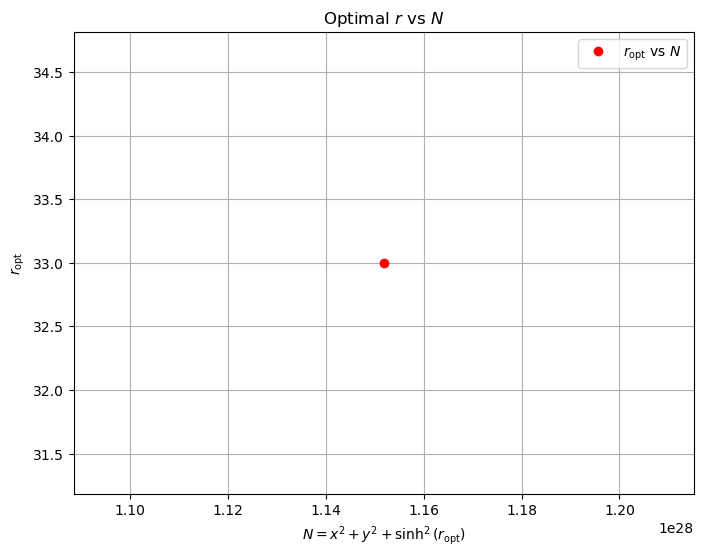

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrices V_lambda,r
def V(lambda_val, r):
    matrix = np.array([[1 - lambda_val + lambda_val * np.exp(-2 * r), 0],
                       [0, 1 - lambda_val + lambda_val * np.exp(2 * r)]])
    return matrix

# Define the function delta(lambda_1, lambda_2, alpha)
def delta(lambda_1, lambda_2, alpha):
    return (np.sqrt(lambda_1) - np.sqrt(lambda_2)) * alpha

# Define the function G_lambda
def G(lambda_val):
    J = np.array([[0, 1], [-1, 0]])
    V_lambda = V(lambda_val, 1)  # Assuming r = 1
    G_val = 2j * J * np.arctanh(2 * V_lambda * 1j * J)
    return G_val

# Define the function Sigma(V1, V2, delta)
def Sigma(V1, V2, delta):
    term1 = np.log(np.linalg.det(V2 + 1j * G(1) / 2))
    term2 = np.trace(V1 @ G(2))
    term3 = delta.T @ G(2) @ delta
    result = (term1 + term2 + term3) / (2 * np.log(2))
    return result.real  # Taking the real part 

## Define the function S(lambda_1, lambda_2, r)
def S(lambda_1, lambda_2, r):
    V1 = V(lambda_1, r)
    V2 = V(lambda_2, r)
    alpha = np.array([0, 0])  # Assuming alpha as [0, 0]
    delta_val = delta(lambda_1, lambda_2, alpha)
    result = -Sigma(V1, V1, np.array([0, 0])) + Sigma(V1, V2, delta_val)
    return result

# Generate values for lambda_1 and lambda_2
lambda_vals = np.linspace(0.01, 0.99, 100)
r_vals = np.linspace(1, 100, 100)  # Range of r values to explore
alpha = np.array([0.5, 0.5])  # Fixed alpha, change as needed

# Calculate S(lambda_1, lambda_2, r) for each pair and each r value
S_max_values = []
for r_val in r_vals:
    S_vals = np.zeros((len(lambda_vals), len(lambda_vals)))
    for i, lambda_1 in enumerate(lambda_vals):
        for j, lambda_2 in enumerate(lambda_vals):
            S_vals[i, j] = S(lambda_1, lambda_2, r_val)
    S_max_values.append(np.max(S_vals))

# Find the optimal r value that maximizes S
r_opt = r_vals[np.argmax(S_max_values)]
N_opt = alpha[0]**2 + alpha[1]**2 + np.sinh(r_opt)**2

# Plot r_opt against N
plt.figure(figsize=(8, 6))
plt.plot(N_opt, r_opt, 'ro', label=r'$r_{\text{opt}}$ vs $N$')
plt.xlabel(r'$N = x^2 + y^2 + \sinh^2(r_{\text{opt}})$')
plt.ylabel(r'$r_{\text{opt}}$')
plt.title(r'Optimal $r$ vs $N$')
plt.legend()
plt.grid(True)
plt.savefig('r_opt_vs_N_plot.pdf')
plt.show()


In [10]:
r_opt

33.0

### 3D Surface Plot:

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Flatten X and Y into 1D arrays
X_flat = X.flatten()
Y_flat = Y.flatten()

# Plot the surface of Sigma_vals
ax.plot_trisurf(X_flat, Y_flat, Sigma_vals.flatten(), cmap='viridis')
ax.set_xlabel('Lambda 1')
ax.set_ylabel('Lambda 2')
ax.set_zlabel('Sigma')
ax.set_title('Sigma as a 3D Surface')
plt.show()



In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up the figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Flatten X and Y into 1D arrays
X_flat = X.flatten()
Y_flat = Y.flatten()

# Plot the 3D surface using Sigma_vals
surf = ax.plot_trisurf(X_flat, Y_flat, Sigma_vals.flatten(), cmap='viridis')

# Set labels and title
ax.set_xlabel(r'$\lambda_1$')
ax.set_ylabel(r'$\lambda_2$')
ax.set_zlabel(r'$\Sigma$')
ax.set_title('Sigma as a 3D Surface')

# Add color bar
fig.colorbar(surf, ax=ax, label=r'$\Sigma$')
# Save the plot as a PDF file
plt.savefig('3D_surface_plot.pdf')
# Show the plot
plt.show()


## 3D Surface Plot for $S(\lambda_1, \lambda_2, r)$:

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import matplotlib.pyplot as plt
# Generate values for lambda_1 and lambda_2
lambda_vals = np.linspace(0.01, 0.99, 100)
r_val = 0.5  # Choose an appropriate value for r

# Calculate S(lambda_1, lambda_2, r) for each pair
S_vals = np.zeros((len(lambda_vals), len(lambda_vals)))
for i, lambda_1 in enumerate(lambda_vals):
    for j, lambda_2 in enumerate(lambda_vals):
        S_vals[i, j] = S(lambda_1, lambda_2, r_val)


# Set up the figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Flatten X and Y into 1D arrays
X_flat = X.flatten()
Y_flat = Y.flatten()

# Plot the 3D surface using Sigma_vals
surf = ax.plot_trisurf(X_flat, Y_flat, S_vals.flatten(), cmap='viridis')

# Set labels and title
ax.set_xlabel(r'$\lambda_1$')
ax.set_ylabel(r'$\lambda_2$')
ax.set_zlabel(r'$S(\lambda_1, \lambda_2, r)$')
ax.set_title(r'$S(\lambda_1, \lambda_2, r)$ as a 3D Surface')

# Add color bar
fig.colorbar(surf, ax=ax, label=r'$S(\lambda_1, \lambda_2, r)$')
# Save the plot as a PDF file
plt.savefig('3D_surface_plot_S_vals.pdf')
# Show the plot
plt.show()
